In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from astroML.utils import split_samples

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# creating a dict file  
sex = {'male': 1,'female': 2} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
train.Sex = [sex[item] for item in train.Sex] 
test.Sex = [sex[item] for item in test.Sex]

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [65]:
# Train
subset = train[["Survived", "Pclass", "SibSp", "Parch", "Sex", "Age", "Fare"]].dropna()
X = subset[["Sex", "Age", "Fare", "SibSp", "Parch", "Pclass"]]
y = subset[["Survived"]]
(X_train, X_valid), (y_train, y_valid) = split_samples(X, y, [0.75, .25], random_state=0)

clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)

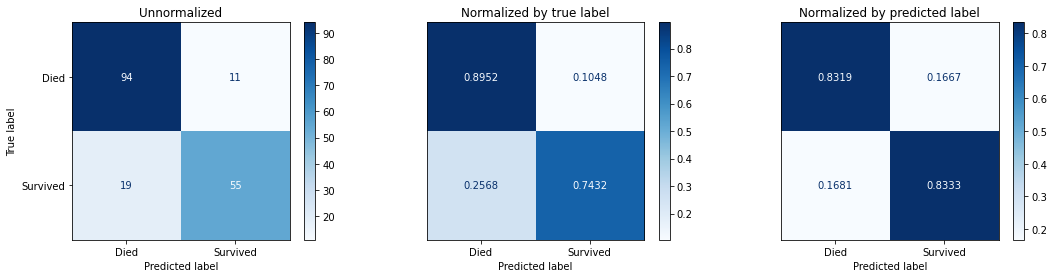

In [66]:
# Validation
prediction = clf.predict(X_valid)

labels = ['Died', 'Survived']


# plot the confusion matrix
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

# unnormalized version
disp = plot_confusion_matrix(clf, X_valid, y_valid, display_labels=labels, \
                      values_format='d', ax=ax[0], cmap='Blues')
disp.ax_.set_title('Unnormalized')

# normalized by true label
disp = plot_confusion_matrix(clf, X_valid, y_valid, display_labels=labels, \
                      normalize='true', ax=ax[1], values_format='.4f', cmap='Blues')
disp.ax_.set_title('Normalized by true label')
disp.ax_.set_ylabel('')
disp.ax_.set_yticks([])

# normalized by predicted label
disp = plot_confusion_matrix(clf, X_valid, y_valid, display_labels=labels, \
                      normalize='pred', values_format='.4f', ax=ax[2], cmap='Blues')
disp.ax_.set_title('Normalized by predicted label')
disp.ax_.set_ylabel('')
disp.ax_.set_yticks([])
plt.show()


In [60]:
# Test
test_subset = test[["PassengerId", "Pclass", "SibSp", "Parch", "Sex", "Age", "Fare"]].fillna(value=test['Age'].mean())

X_test = test_subset[["Sex", "Age", "Fare", "SibSp", "Parch", "Pclass"]]

prediction = clf.predict(X_test)

test_subset['Survived'] = prediction

In [54]:
submission = test_subset[["PassengerId","Survived"]]

In [55]:
submission.to_csv("Results.csv", index=False)

30.272590361445783